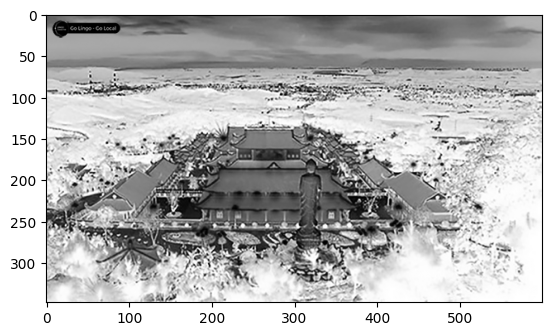

In [17]:
#1.1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im_1 = np.asarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img, cmap='gray')
plt.show()

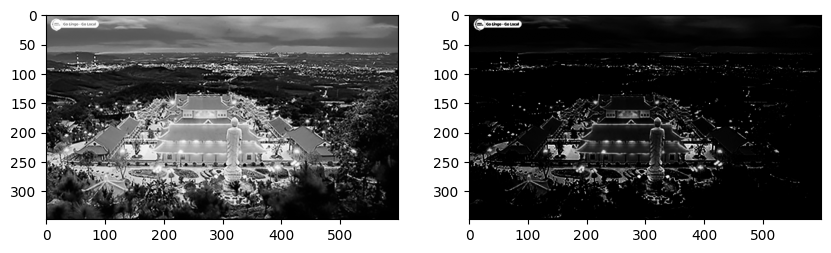

In [20]:
#1.22
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im_1 = np.asarray(img)
gamma = 5

D1 = im_1.astype(float)
D2 = np.max(D1)
D3 = D1/D2

D3 = np.where(D3 == 0, 1e-10, D3)
gamma_corrected = np.exp(np.log(D3) * gamma) * 255.0
gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)

output_img = Image.fromarray(gamma_corrected)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(output_img, cmap='gray')
plt.show()

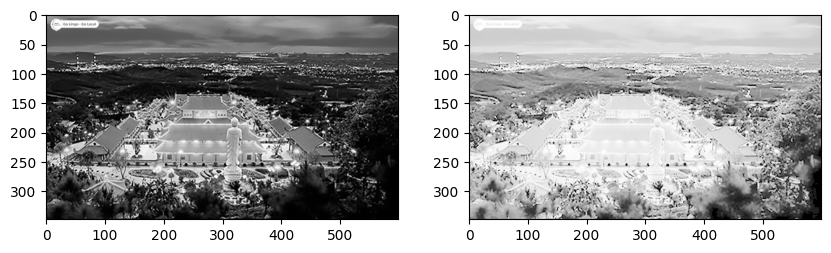

In [18]:
#1.3
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
img_array = np.asarray(img)
float_array = img_array.astype(float)
max_val = np.max(float_array)

log_transformed = (128.0 * np.log(1 + float_array)) / np.log(1 + max_val)
log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8)

output_img = Image.fromarray(log_transformed)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(output_img, cmap='gray')
plt.show()

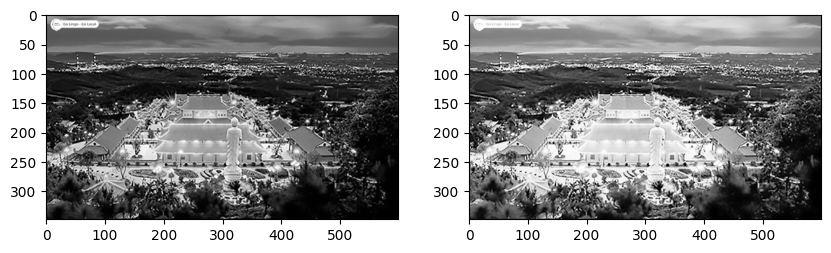

In [21]:
#1.4
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im1 = np.asarray(img)
pixels = im1.flatten()

hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

im2 = cdf[pixels]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(im4, cmap='gray')
plt.show()

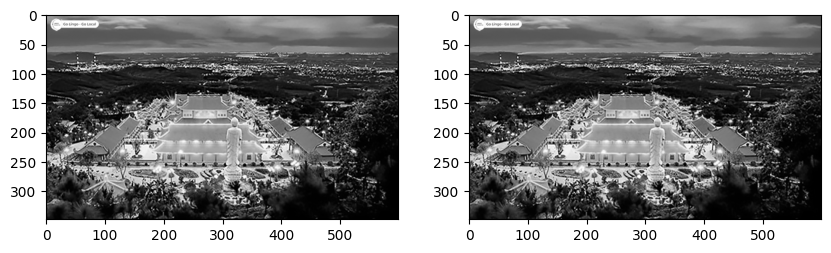

In [24]:
#1.5
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im = np.asarray(img)
a, b = im.min(), im.max()

stretched = 255 * (im.astype(float) - a) / (b - a)
result = Image.fromarray(stretched.astype(np.uint8))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

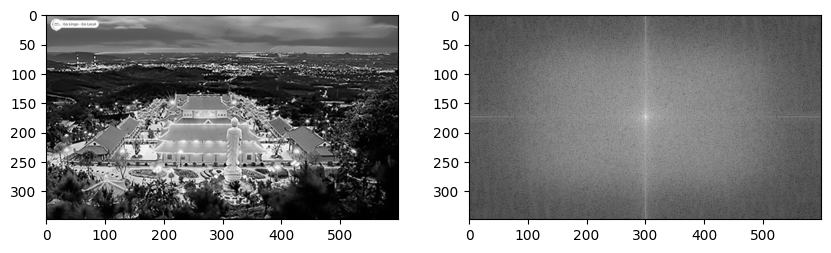

In [25]:
#1.6.1
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im = np.asarray(img)

fft = np.abs(scipy.fftpack.fft2(im))
shifted = scipy.fftpack.fftshift(fft)
log_fft = np.log(1 + shifted)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(log_fft, cmap='gray')
plt.show()


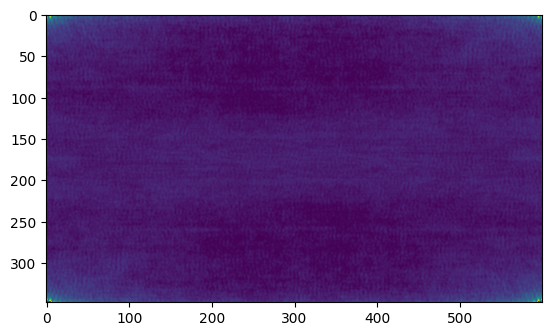

In [26]:
#1.6.2
from PIL import Image
import scipy.fftpack
import numpy as np
import math
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
iml = np.asarray(img)

c = abs(scipy.fftpack.fft2(iml))
d = scipy.fftpack.fftshift(c)

M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))

center1 = M/2
center2 = M/2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t1)

con = d * H
e = abs(scipy.fftpack.ifft2(con))
im3 = Image.fromarray(e.astype(np.uint8))

img.show()
im3.show()
plt.imshow(im3)
plt.show()

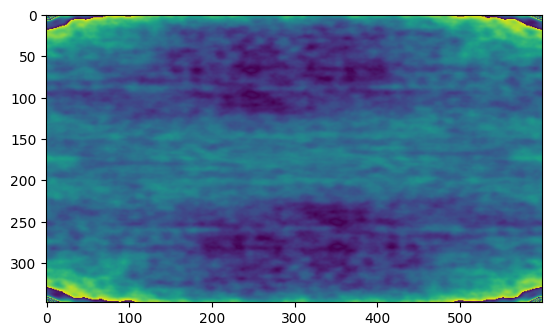

In [27]:
#1.6.2
from PIL import Image
import scipy.fftpack
import numpy as np
import math
import matplotlib.pyplot as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
imi = np.asarray(img)

c = abs(scipy.fftpack.fft2(imi))
d = scipy.fftpack.fftshift(c)

M = d.shape[0]
N = d.shape[1]
H = np.ones((M,N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t2)

con = d * H
e = abs(scipy.fftpack.ifft2(con))
im3 = Image.fromarray(e.astype(np.uint8))

img.show()
im3.show()
plt.imshow(im3)
plt.show()

Chương trình xử lý ảnh
Các phương pháp biến đổi ảnh:
I - Image inverse transformation
G - Gamma-Correction
L - Log Transformation
H - Histogram equalization
C - Contrast Stretching
Q - Thoát chương trình
Lựa chọn không hợp lệ. Vui lòng chọn lại.


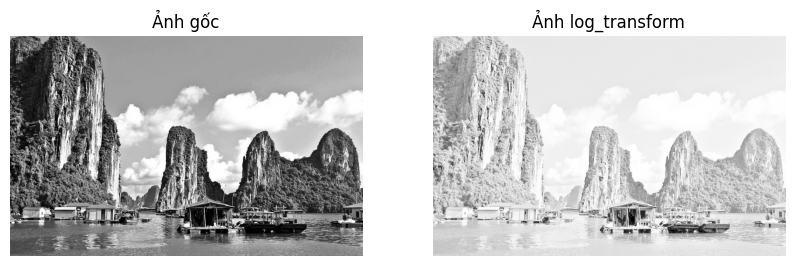

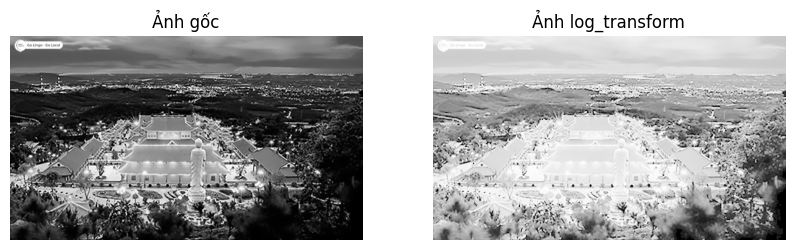

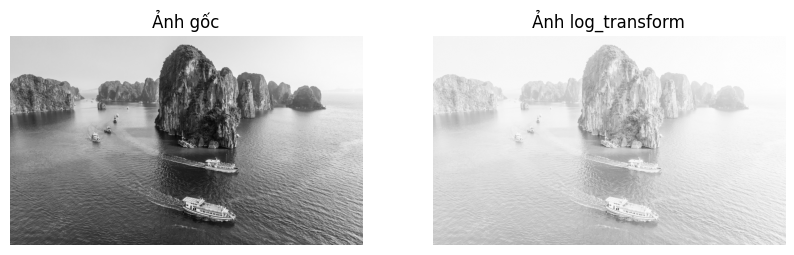

In [ ]:
#b1
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('L')  
            images.append((filename, img))
        except:
            print(f"Không thể mở ảnh {filename}")
    return images

def image_inverse_transformation(img):
    img_array = np.asarray(img)
    inverted_img_array = 255 - img_array
    inverted_img = Image.fromarray(inverted_img_array)
    return inverted_img

def gamma_correction(img, gamma=0.5):
    img_array = np.asarray(img).astype(float)
    max_val = np.max(img_array)
    normalized = img_array / max_val
    corrected = np.power(normalized, gamma) * 255.0
    corrected_img = Image.fromarray(corrected.astype(np.uint8))
    return corrected_img

def log_transformation(img):
    img_array = np.asarray(img).astype(float)
    max_val = np.max(img_array)
    c = 255 / np.log(1 + max_val)
    log_transformed = c * np.log(1 + img_array)
    log_img = Image.fromarray(log_transformed.astype(np.uint8))
    return log_img

def histogram_equalization(img):
    img_array = np.asarray(img)
    img_flatten = img_array.flatten()
    hist, bins = np.histogram(img_flatten, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')
    equalized_img_array = cdf_normalized[img_flatten]
    equalized_img_array = np.reshape(equalized_img_array, img_array.shape)
    equalized_img = Image.fromarray(equalized_img_array)
    return equalized_img

def contrast_stretching(img):
    img_array = np.asarray(img).astype(float)
    a = img_array.min()
    b = img_array.max()
    stretched = 255 * (img_array - a) / (b - a)
    stretched_img = Image.fromarray(stretched.astype(np.uint8))
    return stretched_img

def process_images_in_folder(folder_path, process_func, output_folder, process_name):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    images = load_images_from_folder(folder_path)
    for filename, img in images:
        processed_img = process_func(img)
        
        output_filename = f"{os.path.splitext(filename)[0]}_{process_name}.png"
        output_path = os.path.join(output_folder, output_filename)
        processed_img.save(output_path)
        

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Ảnh gốc')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(processed_img, cmap='gray')
        plt.title(f'Ảnh {process_name}')
        plt.axis('off')
        
        plt.show()

def main():
    input_folder = "exercise"  
    output_folder = "processed_images"
    print("Chương trình xử lý ảnh")
    print("Các phương pháp biến đổi ảnh:")
    print("I - Image inverse transformation")
    print("G - Gamma-Correction")
    print("L - Log Transformation")
    print("H - Histogram equalization")
    print("C - Contrast Stretching")
    print("Q - Thoát chương trình")
    
    while True:
        choice = input("Nhập lựa chọn của bạn (I/G/L/H/C/Q): ").upper()
        
        if choice == 'Q':
            print("Kết thúc chương trình.")
            break
        elif choice == 'I':
            process_images_in_folder(input_folder, image_inverse_transformation, 
                                   output_folder, "inverse")
        elif choice == 'G':
            gamma = float(input("Nhập giá trị gamma (ví dụ 0.5): "))
            process_func = lambda img: gamma_correction(img, gamma)
            process_images_in_folder(input_folder, process_func, 
                                   output_folder, f"gamma_{gamma}")
        elif choice == 'L':
            process_images_in_folder(input_folder, log_transformation, 
                                   output_folder, "log_transform")
        elif choice == 'H':
            process_images_in_folder(input_folder, histogram_equalization, 
                                   output_folder, "hist_equalized")
        elif choice == 'C':
            process_images_in_folder(input_folder, contrast_stretching, 
                                   output_folder, "contrast_stretched")
        else:
            print("Lựa chọn không hợp lệ. Vui lòng chọn lại.")

if __name__ == "__main__":
    main()

Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


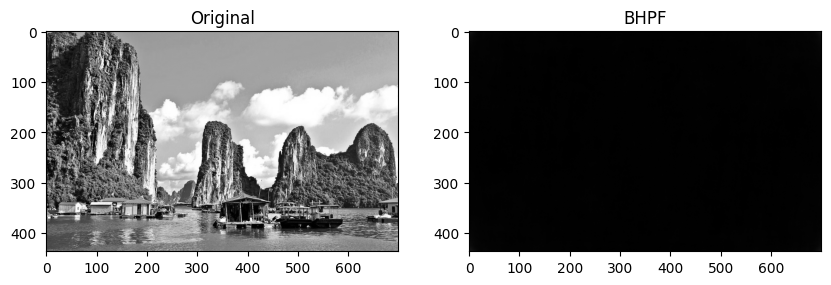

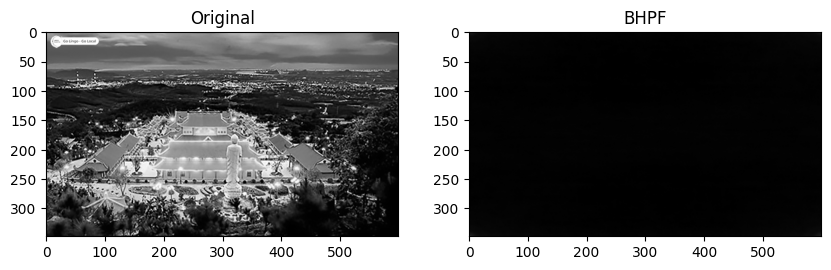

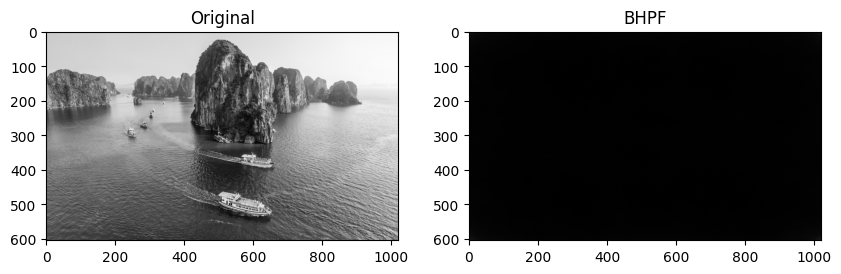

In [ ]:
#b2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.fftpack
import math
import os
def fast_fourier(img_path):
    img = Image.open(img_path).convert('L')
    im1 = np.asarray(img)
    c = abs(scipy.fftpack.fft2(im1))
    d = scipy.fftpack.fftshift(c)
    d = d.astype(float)
    im3 = Image.fromarray(d)
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(np.log1p(d), cmap='gray'), plt.title('FFT')
    plt.show()
def butterworth_lowpass(img_path):
    img = Image.open(img_path).convert('L')
    im1 = np.asarray(img)
    c = abs(scipy.fftpack.fft2(im1))
    d = scipy.fftpack.fftshift(c)
    M, N = d.shape
    H = np.ones((M, N))
    center1, center2 = M/2, N/2
    d_0 = 30.0
    t1 = 1
    
    for i in range(1, M):
        for j in range(1, N):
            r = math.sqrt((i - center1)**2 + (j - center2)**2)
            if r > d_0:
                H[i, j] = 1/(1 + (r/d_0)**(2*t1))
    
    con = d * H
    e = abs(scipy.fftpack.ifft2(con))
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(e, cmap='gray'), plt.title('BLPF')
    plt.show()
def butterworth_highpass(img_path):
    img = Image.open(img_path).convert('L')
    im1 = np.asarray(img)
    c = abs(scipy.fftpack.fft2(im1))
    d = scipy.fftpack.fftshift(c)
    M, N = d.shape
    H = np.ones((M, N))
    center1, center2 = M/2, N/2
    d_0 = 30.0
    t1 = 1  
    for i in range(1, M):
        for j in range(1, N):
            r = math.sqrt((i - center1)**2 + (j - center2)**2)
            if r > d_0:
                H[i, j] = 1/(1 + (d_0/r)**(2*t1))
    
    con = d * H
    e = abs(scipy.fftpack.ifft2(con))
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(e, cmap='gray'), plt.title('BHPF')
    plt.show()

def menu_2():
    print("Chọn phương pháp biến đổi ảnh:")
    print("F - Fast Fourier")
    print("L - Butterworth Lowpass Filter")
    print("H - Butterworth Highpass Filter")
    choice = input("Nhập lựa chọn (F/L/H): ").upper()
    image_files = ['exercise/ha-long-bay-in-vietnam.jpg', 'exercise/pagoda.jpg', 'exercise/quang_ninh.jpg']
    for img_path in image_files:
        if choice == 'F':
            fast_fourier(img_path)
        elif choice == 'L':
            butterworth_lowpass(img_path)
        elif choice == 'H':
            butterworth_highpass(img_path)
        else:
            print("Lựa chọn không hợp lệ")
            return

menu_2()

In [ ]:
#b3
import numpy as np
from PIL import Image
import random
import os
def rgb_permutation(img_path):
    img = Image.open(img_path)
    arr = np.array(img)
    
  
    perm = random.sample([0, 1, 2], 3)
    new_arr = arr.copy()
    new_arr[:,:,0] = arr[:,:,perm[0]]
    new_arr[:,:,1] = arr[:,:,perm[1]]
    new_arr[:,:,2] = arr[:,:,perm[2]]
    
    return Image.fromarray(new_arr)

def random_transform_1(img):
    choice = random.choice(['inverse', 'gamma', 'log', 'histogram', 'contrast'])
    
    if choice == 'inverse':
        arr = 255 - np.array(img)
        return Image.fromarray(arr)
    elif choice == 'gamma':
        gamma = random.uniform(0.1, 5.0)
        arr = np.array(img, dtype=float)
        arr = 255 * (arr / 255) ** gamma
        return Image.fromarray(arr.astype(np.uint8))
    elif choice == 'log':
        arr = np.array(img, dtype=float)
        c = 255 / np.log(1 + np.max(arr))
        log_arr = c * np.log(1 + arr)
        return Image.fromarray(log_arr.astype(np.uint8))
    elif choice == 'histogram':
        arr = np.array(img.convert('L'))
        hist, bins = np.histogram(arr.flatten(), 256, [0,256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * 255 / cdf[-1]
        equalized = np.interp(arr.flatten(), bins[:-1], cdf_normalized)
        return Image.fromarray(equalized.reshape(arr.shape).astype(np.uint8))
    elif choice == 'contrast':
        arr = np.array(img.convert('L'))
        min_val, max_val = arr.min(), arr.max()
        stretched = 255 * (arr - min_val) / (max_val - min_val)
        return Image.fromarray(stretched.astype(np.uint8))


def bai_3():
    image_files = ['exercise/ha-long-bay-in-vietnam.jpg', 'exercise/pagoda.jpg', 'exercise/quang_ninh.jpg']
    
    for img_path in image_files:
  
        permuted_img = rgb_permutation(img_path)
        
        
        transformed_img = random_transform_1(permuted_img)
        
        
        permuted_img.show(title="RGB Permuted")
        transformed_img.show(title="Transformed")

bai_3()

In [ ]:
#b4
import numpy as np
from PIL import Image
import random
import scipy.ndimage
import scipy.fftpack
import math

def rgb_permutation(img_path):
    img = Image.open(img_path)
    arr = np.array(img)

    perm = random.sample([0, 1, 2], 3)
    new_arr = arr.copy()
    new_arr[:,:,0] = arr[:,:,perm[0]]
    new_arr[:,:,1] = arr[:,:,perm[1]]
    new_arr[:,:,2] = arr[:,:,perm[2]]
    
    return Image.fromarray(new_arr)

def min_filter(img, size=3):
    arr = np.array(img.convert('L'))
    return Image.fromarray(scipy.ndimage.minimum_filter(arr, size))


def max_filter(img, size=3):
    arr = np.array(img.convert('L'))
    return Image.fromarray(scipy.ndimage.maximum_filter(arr, size))

def random_transform_2(img):
    choice = random.choice(['fft', 'lowpass', 'highpass'])
    
    if choice == 'fft':
        arr = np.array(img.convert('L'))
        fft = np.fft.fft2(arr)
        fft_shift = np.fft.fftshift(fft)
        magnitude = np.log(np.abs(fft_shift))
        return Image.fromarray((magnitude * 255 / magnitude.max()).astype(np.uint8))
    elif choice == 'lowpass':
        arr = np.array(img.convert('L'))
        fft = np.fft.fft2(arr)
        fft_shift = np.fft.fftshift(fft)
        
        rows, cols = arr.shape
        crow, ccol = rows//2, cols//2
        mask = np.zeros((rows, cols), np.uint8)
        r = 30  # Bán kính
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
        mask[mask_area] = 1
        
        fft_shift = fft_shift * mask
        fft_ishift = np.fft.ifftshift(fft_shift)
        img_back = np.fft.ifft2(fft_ishift)
        img_back = np.abs(img_back)
        
        img_filtered = min_filter(Image.fromarray(img_back.astype(np.uint8)))
        return img_filtered
    elif choice == 'highpass':
        arr = np.array(img.convert('L'))
        fft = np.fft.fft2(arr)
        fft_shift = np.fft.fftshift(fft)
        
        rows, cols = arr.shape
        crow, ccol = rows//2, cols//2
        fft_shift[crow-30:crow+30, ccol-30:ccol+30] = 0
        fft_ishift = np.fft.ifftshift(fft_shift)
        img_back = np.fft.ifft2(fft_ishift)
        img_back = np.abs(img_back)
        
        img_filtered = max_filter(Image.fromarray(img_back.astype(np.uint8)))
        return img_filtered


def bai_4():
    image_files = ['exercise/ha-long-bay-in-vietnam.jpg', 'exercise/pagoda.jpg', 'exercise/quang_ninh.jpg']
    
    for img_path in image_files:
        permuted_img = rgb_permutation(img_path)
        
        transformed_img = random_transform_2(permuted_img)
        
        permuted_img.show(title="RGB Permuted")
        transformed_img.show(title="Transformed")

bai_4()